In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pymongo
import pickle
import time
import certifi

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [215]:
data = pd.read_csv('./CleanData_V2_Preprocessed.csv')
data.head()

,Gender,Race/Ethnicity,Home_City,Preferred_Langauge,Hobby_Interest,Budget,Fathers_Occupation,Mothers_Occupation,Study_Group,Degree_Program,Matric_Grade,Inter_Grade,Year_of_Admission,Campus,University
0,male,Punjabi,Peshawar,Urdu,Nothing,Low,Doctor,House Wife,CS,BSCS,A,C,2019,Peshawar,FAST NUCES
1,male,Pashtun,Kohat,Pashto,Reading,Low,Engrr,House Wife,Pre-Engrr,BSEE,B,B,2020,Islamabad,COMSATS
2,male,Punjabi,Islamabad,Punjabi,Gaming,High,Army,Doctor,Pre-Engrr,BSME,B,B,2019,Lahore,LUMS
3,female,Punjabi,Islamabad,Urdu,Nothing,Low,Engrr,House Wife,Pre-Med,Medical,B,B,2019,Peshawar,KMC
4,female,Other,Lahore,English,Sports,High,Doctor,Teacher,Pre-Engrr,BSEE,B,B,2019,Lahore,LUMS


### Feature Engineering

In [216]:
data.drop(columns=['Gender', 'Hobby_Interest',
          'Fathers_Occupation', 'Mothers_Occupation', 'Year_of_Admission'],  inplace=True)


In [217]:
data.head()

,Race/Ethnicity,Home_City,Preferred_Langauge,Budget,Study_Group,Degree_Program,Matric_Grade,Inter_Grade,Campus,University
0,Punjabi,Peshawar,Urdu,Low,CS,BSCS,A,C,Peshawar,FAST NUCES
1,Pashtun,Kohat,Pashto,Low,Pre-Engrr,BSEE,B,B,Islamabad,COMSATS
2,Punjabi,Islamabad,Punjabi,High,Pre-Engrr,BSME,B,B,Lahore,LUMS
3,Punjabi,Islamabad,Urdu,Low,Pre-Med,Medical,B,B,Peshawar,KMC
4,Other,Lahore,English,High,Pre-Engrr,BSEE,B,B,Lahore,LUMS


### Splitting Data

In [218]:
X = data.iloc[:, 0:9]
y = data.iloc[:, 9]

### Encoding Data for Machine Learning

In [219]:
le = preprocessing.LabelEncoder()

# gender = le.fit_transform(list(X['Gender']))
race = le.fit_transform(list(X['Race/Ethnicity']))
home_city = le.fit_transform(list(X['Home_City']))
preferred_lang = le.fit_transform(list(X['Preferred_Langauge']))
# hobby_interest = le.fit_transform(list(X['Hobby_Interest']))
budget = le.fit_transform(list(X['Budget']))
# F_Occ = le.fit_transform(list(X['Fathers_Occupation']))
# M_Occ = le.fit_transform(list(X['Mothers_Occupation']))
study_group = le.fit_transform(list(X['Study_Group']))
degree_program = le.fit_transform(list(X['Degree_Program']))
matric_grade = le.fit_transform(list(X['Matric_Grade']))
inter_grade = le.fit_transform(list(X['Inter_Grade']))
campus = le.fit_transform(list(X['Campus']))

class_attribute = le.fit_transform(list(y))

X_prep = pd.DataFrame(list(zip(race, home_city, preferred_lang,budget,study_group,
                               degree_program, matric_grade, inter_grade, campus)), columns=['Race/Ethnicity', 'Home_City', 'Preferred_Langauge', 'Budget', 'Study_Group', 'Degree_Program', 'Matric Grade', 'Inter Grade', 'Campus'])

y_prep = pd.DataFrame(list(class_attribute), columns=['University'])


### Splitting Data

In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(X_prep, y_prep, random_state=99)

In [221]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(150, 9)
(50, 9)
(150, 1)
(50, 1)


In [222]:
Y_train = np.ravel(Y_train)
Y_train

array([7, 6, 2, 5, 1, 8, 9, 1, 3, 0, 8, 8, 2, 7, 4, 1, 0, 9, 4, 6, 8, 4,
       4, 0, 3, 5, 1, 2, 6, 4, 8, 5, 8, 8, 7, 9, 3, 0, 3, 2, 5, 7, 2, 2,
       5, 0, 5, 3, 4, 6, 6, 4, 9, 2, 4, 6, 1, 0, 1, 7, 1, 9, 2, 1, 7, 2,
       2, 4, 7, 6, 0, 7, 5, 3, 3, 1, 0, 0, 7, 7, 3, 5, 9, 3, 6, 9, 1, 3,
       9, 8, 3, 0, 7, 9, 2, 1, 0, 8, 5, 1, 2, 8, 3, 3, 0, 4, 0, 2, 4, 9,
       8, 4, 2, 1, 9, 6, 5, 5, 8, 3, 3, 2, 2, 7, 4, 6, 5, 8, 4, 1, 7, 5,
       4, 4, 6, 6, 0, 9, 3, 5, 0, 6, 5, 6, 7, 6, 8, 0, 2, 8], dtype=int64)

# Creating Machine Learning Models

In [223]:
# RFC Model Training
rfc = RandomForestClassifier(
    n_estimators=100, criterion='gini', random_state=99)
rfc.fit(X_train, Y_train)
y_pred1 = rfc.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred1)*100, "%")

Accuracy:  88.0 %


In [224]:
print(classification_report(y_pred1, Y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      0.71      0.77         7
           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       0.80      0.80      0.80         5
           7       0.83      0.83      0.83         6
           8       1.00      1.00      1.00         5
           9       0.75      1.00      0.86         6

    accuracy                           0.88        50
   macro avg       0.89      0.90      0.89        50
weighted avg       0.89      0.88      0.88        50



### Cross-Validation of RFC

In [225]:
result = cross_val_score(rfc, X_train, Y_train, cv=12)
rfc_CV_accuracy = result.mean()*100
print("Cross-Validation Accuracy: ", rfc_CV_accuracy)


Cross-Validation Accuracy:  82.05128205128204


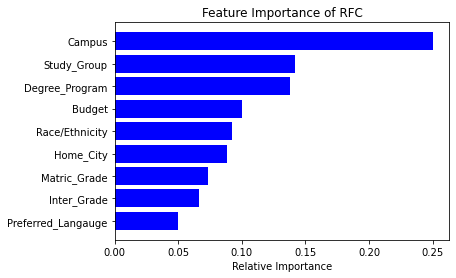

In [226]:
features = data.columns
importance = rfc.feature_importances_
indices = np.argsort(importance)

plt.title('Feature Importance of RFC')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [227]:
# SVC Model Training
svc = SVC(kernel='linear', C=1.0, random_state=5)
svc.fit(X_train, Y_train)
y_pred2 = svc.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred2)*100, "%")


Accuracy:  70.0 %


In [228]:
print(classification_report(y_pred2, Y_test))


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.67      0.80      0.73         5
           2       0.33      0.25      0.29         4
           3       0.50      0.33      0.40         6
           4       1.00      1.00      1.00         4
           5       0.80      1.00      0.89         4
           6       1.00      0.83      0.91         6
           7       0.67      0.67      0.67         6
           8       0.80      0.80      0.80         5
           9       0.62      0.83      0.71         6

    accuracy                           0.70        50
   macro avg       0.69      0.70      0.69        50
weighted avg       0.69      0.70      0.69        50



### Cross-Validation of SVC

In [229]:
result = cross_val_score(svc, X_train, Y_train, cv=10)
svc_CV_accuracy = result.mean()*100
print("Cross-Validation Accuracy: ", svc_CV_accuracy)


Cross-Validation Accuracy:  73.33333333333331


In [230]:
# Decision Tree Classification (DTC) Model Training
dtc = DecisionTreeClassifier(criterion='gini', random_state=10)
dtc.fit(X_train, Y_train)
y_pred3 = dtc.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred3)*100, "%")


Accuracy:  84.0 %


In [231]:
print(classification_report(y_pred3, Y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      0.71      0.77         7
           2       0.67      1.00      0.80         2
           3       1.00      0.50      0.67         8
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       0.80      0.80      0.80         5
           7       0.67      0.80      0.73         5
           8       1.00      1.00      1.00         5
           9       0.62      1.00      0.77         5

    accuracy                           0.84        50
   macro avg       0.86      0.88      0.85        50
weighted avg       0.87      0.84      0.84        50



### Cross-Validation of DTC

In [232]:
result = cross_val_score(dtc, X_train, Y_train, cv=10)
dtc_CV_accuracy = result.mean()*100
print("Cross-Validation Accuracy: ", dtc_CV_accuracy)


Cross-Validation Accuracy:  78.0


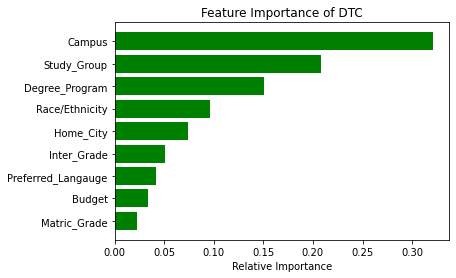

In [233]:
features = data.columns
importance = dtc.feature_importances_
indices = np.argsort(importance)

plt.title('Feature Importance of DTC')
plt.barh(range(len(indices)), importance[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [234]:
#XGB model training

dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)


In [235]:
param = {
    'max_depth': 10,  # the maximum depth of each tree
    'eta': 0.30,  # the training step for each iteration
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': len(data['University'].unique())}  # the number of classes that exist in this datset
num_round = 550  # the number of training iterations


bst = xgb.train(param, dtrain, num_round)
y_pred4 = bst.predict(dtest)
y_pred4.shape

(50, 10)

In [236]:
best_preds = np.asarray([np.argmax(line) for line in y_pred4])
# print(np.mean(best_preds != Y_test.squeeze()))
# print(confusion_matrix(Y_test, best_preds))
# print(classification_report(Y_test, best_preds))
print("Accuracy: ", accuracy_score(Y_test, best_preds)*100, "%")


Accuracy:  84.0 %


In [237]:
print(classification_report(best_preds, Y_test.squeeze()))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      0.60      0.55         5
           2       0.67      0.50      0.57         4
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       0.80      0.80      0.80         5
           7       0.83      0.83      0.83         6
           8       1.00      1.00      1.00         5
           9       0.75      1.00      0.86         6

    accuracy                           0.84        50
   macro avg       0.86      0.84      0.84        50
weighted avg       0.85      0.84      0.84        50



In [238]:
# Training bagging ensemble model
bclf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, max_samples=0.8, oob_score=True,
                         random_state=0,).fit(X_train, Y_train)


In [239]:
bclf.oob_score_

0.8133333333333334

In [240]:
y_pred5 = bclf.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred5)*100, "%")


Accuracy:  88.0 %


In [241]:
print(classification_report(y_pred5, Y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      0.71      0.77         7
           2       0.33      1.00      0.50         1
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       0.80      0.67      0.73         6
           7       0.83      0.83      0.83         6
           8       1.00      1.00      1.00         5
           9       0.88      1.00      0.93         7

    accuracy                           0.88        50
   macro avg       0.87      0.90      0.87        50
weighted avg       0.90      0.88      0.88        50



### Cross-Validation of BCLF

In [242]:
result = cross_val_score(bclf, X_train, Y_train, cv=12)
bclf_CV_accuracy = result.mean()*100
print("Cross-Validation Accuracy: ", bclf_CV_accuracy)


Cross-Validation Accuracy:  81.3568376068376


In [243]:
adab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, random_state=0).fit(X_train, Y_train)

In [244]:
y_pred6 = adab.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred6)*100, "%")


Accuracy:  86.0 %


In [245]:
print(classification_report(y_pred6, Y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      0.71      0.77         7
           2       0.67      1.00      0.80         2
           3       1.00      0.57      0.73         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       0.80      0.80      0.80         5
           7       0.67      0.80      0.73         5
           8       1.00      1.00      1.00         5
           9       0.75      1.00      0.86         6

    accuracy                           0.86        50
   macro avg       0.87      0.89      0.87        50
weighted avg       0.88      0.86      0.86        50



### Cross-Validation of ADAB

In [246]:
result = cross_val_score(adab, X_train, Y_train, cv=12)
adab_CV_accuracy = result.mean()*100
print("Cross-Validation Accuracy: ", adab_CV_accuracy)


Cross-Validation Accuracy:  83.97435897435899


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


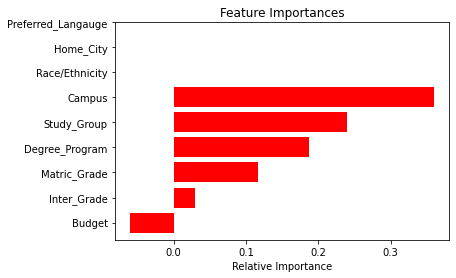

In [247]:
features = data.columns
importance = adab.feature_importances_
indices = np.argsort(importance)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
